In [3]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from scipy.sparse import hstack, coo_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [4]:
df_by_post = pd.read_csv('../data/posts.csv')

In [5]:
labels = {
    #Quarantined subreddits
    'TheRedPill' : -1,

    #apolitical (I think)
    'BlackPeopleTwitter' : 1,
    'WhitePeopleTwitter' : 1,
    'politics' : 0,
    'law' : 0,
    'news' : 0,
    'worldnews' : 0,
    'Jokes' : 0,
    'funny' : 0,
    'gaming' : 0,
    'Games' : 0,
    'technology' : 0,
    'tech' : 0,
    'technews' : 0,
    'gadgets' : 0,
    'space' : 0,
    'science' : 0,
    'nextfuckinglevel' : 0,
    'MurderedByWords' : 0,
    'mildlyinteresting' : 0,
    'Damnthatsinteresting' : 0,
    'mildlyinfuriating' : 0,
    'wallstreetbets' : 0,
    'Superstonk' : 0,
    'shitposting' : 0,
    'pcmasterrace' : 0,
    'teenagers' : 0,
    'PublicFreakout' : 0,
    'memes' : 0,
    'AskReddit' : 0,
    'AskAnAmerican' : 0,
    'Gamingcirclejerk' : 0,
    'nottheonion' : 0,
    'gatesopencomeonin' : 0,
    'wholesomememes' : 0,
    'wholesome' : 0,
    'interestingasfuck' : 0,
    'PoliticalCompassMemes' : 0,
    'PoliticalHumor' : 0,
    'AskMen' : 0,
    'AskWomen' : 0,
    'TooAfraidToAsk' : 0,
    'MadeMeSmile' : 0,
    'rareinsults' : 0,
    'UFOs' : 0,
    'HighStrangeness' : 0,
    'todayilearned' : 0,
    'RoastMe' : 0,
    'CryptoCurrency' : 0,
    'Wellthatsucks' : 0,
    'barstoolsports' : 0,
    'awfuleverything' : 0,
    'unpopularopinion' : 0,
    'atheism' : 0,
    'Christianity' : 0,
    'Catholicism' : 0,
    'changemyview' : 0,
    'Coronavirus' : 0,
    'COVID19' : 0,
    'coronavirusNYC' : 0,
    'Masks4All' : 1,
    'consipiratard' : 0,
    'environment' : 1,
    'TrollXChromosomes' : 1,
    'TrollYChromosome' : 0,
    'WikiLeaks' : -1,
    '4chan' : 0,
    'greentext' : 0,
    'NoStupidQuestions' : 0,
    'offmychest' : 0,
    'texas' : 1,
    'terriblefacebookmemes' : 0,
    'insanepeoplefacebook' : 0,
    'ShitMomGroupsSay' : 0,
    'masskillers' : 0,
    'Parenting' : 0,
    'Marriage' : 0,
    'neoliberal' : 1,
    'spacex' : 0,
    'savedyouaclick' : 0,
    'socialmedia' : 0,
    'moderatepolitics' : 0,
    'virginvschad' : -1,
    'CoronavirusCirclejerk' : -1,

    #left (I think)
    'antiwork' : 1,
    'Anticonsumption' : 1,
    'SelfAwarewolves' : 1,
    'niceguys' : 1,
    'onejoke' : 1,
    'Feminism' : 1,
    'WitchesVsPatriarchy' : 1,
    'AreTheStraightsOK' : 1,
    'ToiletPaperUSA' : 1,
    'LeopardsAteMyFace' : 1,
    'TwoXChromosomes' : 1,
    'Anarchism' : 1,
    'TopMindsOfReddit' : 1,
    'esist' : 1,
    'MarchAgainstNazis' : 1,
    'exredpill' : 1,
    'MensLib' : 1,
    'lgbt' : 1,
    'gay' : 1,
    'bisexual' : 1,
    'AgainstHateSubreddits' : 1,
    'traaaaaaannnnnnnnnns' : 1,
    'trans' : 1,
    'GenderCynical' : 1,
    'EnoughTrumpSpam' : 1,
    'ABoringDystopia' : 1,
    'pointlesslygendered' : 1,
    'Persecutionfetish' : 1,
    'TheRightCantMeme' : 1,
    'MurderedByAOC' : 1,
    'LateStageCapitalism' : 1,
    'TheBluePill' : 1,
    'justneckbeardthings' : 1,
    'NotHowGirlsWork' : 1,
    'CapitalismSux' : 1,
    'GreenAndPleasant' : 1,
    'religiousfruitcake' : 1,
    'FragileWhiteRedditor' : 1,
    'Trumpvirus' : 1,
    'socialism' : 1,
    'asktransgender' : 1,
    'SandersForPresident' : 1,
    'MtF' : 1,
    'ftm' : 1,
    'egg_irl' : 1,
    'NonBinary' : 1,
    'HermanCainAward' : 1,
    'lostgeneration' : 1,
    'stupidpol' : 1,
    'Qult_Headquarters' : 1,
    'IncelTear' : 1,
    'ParlerWatch' : 1,
    'ShitLiberalsSay' : 1,
    'Hasan_Piker' : 1,

    #right (I think)
    'JoeRogan' : -1,
    'dankmemes' : -1,
    'Memes_Of_The_Dank' : -1,
    'okbuddyretard' : -1,
    'okmatewanker' : -1,
    'pussypassdenied' : -1,
    'antifeminists' : -1,
    'MensRights' : -1,
    'ProudMaleFeminists' : -1,
    'WhereAreTheFeminists' : -1,
    'FeminismUncensored' : -1,
    'SRSsucks' : -1,
    'Conservative' : -1,
    'JordanPeterson' : -1,
    'conspiracy' : -1,
    'conspiracy_commons' : -1,
    'tucker_carlson' : -1,
    'TheTrumpZone' : -1,
    'LouderWithCrowder' : -1,
    'Libertarian' : -1,
    'AskThe_Donald' : -1,
    'walkaway' : -1,
    'ConservativesOnly' : -1,
    'IncelsCircleJerk' : -1,
    'BlackPillScience' : -1,
    'Blubber_Whaling' : -1,
    'memegender' : -1,
    'SocialJusticeInAction' : -1,
    'FreeSpeech' : -1,
    'libsofreddit' : -1,
    'EnoughCommieSpam' : -1,
    'TheLeftCantMeme' : -1,
    'Anarcho_Capitalism' : -1,
    'ar15' : -1,
    'guns' : -1,
    'nra' : -1,
    'Firearms' : -1,
    'CCW' : -1,
    'Glocks': -1,
    'tacticalgear' : -1,
    'liberalgunowners' : -1,
    'HillaryForPrison' : -1,
    'Offensivejokes' : -1
}

In [6]:
df_by_post['alignment'] = df_by_post['subreddit'].apply(lambda x: labels[x])

In [7]:
df_by_post.head()

,Unnamed: 0,created_utc,subreddit,subreddit_subscribers,upvote_ratio,num_comments,url,image?,image_text,total_text,tokenned_stopped_text,finalized_text,alignment
0,0,1.502177e+09,TheRedPill,0.0,0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,NaN,Google Fires Ph.D Biologist/Engineer For Claim...,"['google', 'fire', 'ph', 'biologist', 'enginee...",google fire ph biologist engineer claiming ave...,-1
1,1,1.480424e+09,TheRedPill,0.0,0.82,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,NaN,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"['laid', 'warlord', 'rule', 'approaching', 'mo...",laid warlord rule approaching model tier girl ...,-1
2,2,1.502101e+09,TheRedPill,0.0,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,NaN,I have been practicing Stoicism for 3 years no...,"['practicing', 'stoicism', 'year', 'quality', ...",practicing stoicism year quality life increase...,-1
3,3,1.433962e+09,TheRedPill,0.0,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,NaN,"[META] Reddit rolls out first ban wave of ""Har...","['meta', 'reddit', 'roll', 'first', 'ban', 'wa...",meta reddit roll first ban wave harassing subr...,-1
4,4,1.500270e+09,TheRedPill,0.0,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,NaN,"Man gets his ex-GF to pay child support, and R...","['man', 'get', 'ex', 'gf', 'pay', 'child', 'su...",man get ex gf pay child support reddit freak k...,-1


In [8]:
predicting_df = df_by_post.drop(columns = ['url', 'subreddit_subscribers', 'image_text', 'total_text', 'tokenned_stopped_text', 'created_utc', 'subreddit', 'Unnamed: 0'])

In [9]:
predicting_df['image?'] = predicting_df['image?'].astype('float64')

In [10]:
predicting_df.head()

,upvote_ratio,num_comments,image?,finalized_text,alignment
0,0.65,840.0,0.0,google fire ph biologist engineer claiming ave...,-1
1,0.82,760.0,0.0,laid warlord rule approaching model tier girl ...,-1
2,0.86,179.0,0.0,practicing stoicism year quality life increase...,-1
3,0.87,954.0,0.0,meta reddit roll first ban wave harassing subr...,-1
4,0.90,336.0,0.0,man get ex gf pay child support reddit freak k...,-1


In [11]:
predicting_df = predicting_df.dropna()

In [12]:
predicting_df.isna().value_counts()

upvote_ratio  num_comments  image?  finalized_text  alignment
False         False         False   False           False        34996
dtype: int64

# Modeling

In [13]:
X = predicting_df.drop(columns = ['alignment'])
y = predicting_df['alignment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 305)

In [14]:
count_vectorizer = CountVectorizer()
scaler = StandardScaler()

count_transformer = ColumnTransformer(transformers = [('count_vect', count_vectorizer, 'finalized_text')])
scaler_transformer = ColumnTransformer(transformers = [('scaler', scaler, ['upvote_ratio', 'num_comments', 'image?'])])

unifier = FeatureUnion(transformer_list = [('count_transformer', count_transformer), ('scaler_transformer', scaler_transformer)])

In [15]:
dtree = DecisionTreeClassifier()

dpipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dtree)
 ])


In [16]:
dpipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model', Decisio

              precision    recall  f1-score   support

          -1       0.65      0.64      0.64      1763
           0       0.76      0.76      0.76      2863
           1       0.67      0.68      0.68      2374

    accuracy                           0.70      7000
   macro avg       0.69      0.69      0.69      7000
weighted avg       0.70      0.70      0.70      7000



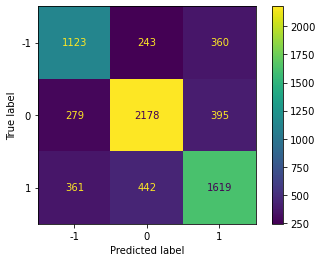

In [17]:
plot_confusion_matrix(dpipe, X_test, y_test)

print(classification_report(dpipe.predict(X_test), y_test))

In [18]:

# dpipe_params = {
#     'model__criterion' : ['gini', 'entropy'],
#     'model__max_depth': [2, 5, 10],
#     'model__min_samples_split': [2, 5, 10, 20],
#     'feature_union__count_transformer__count_vect__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3), (1,3)]
# }

# dpipe_grid = GridSearchCV(dpipe, dpipe_params, cv=5)

In [19]:
# dpipe_grid.fit(X_train, y_train)

# dpipe_grid.best_params_

In [20]:
# plot_confusion_matrix(dpipe_grid.best_estimator_, X_test, y_test)

# print(classification_report(dpipe_grid.best_estimator_.predict(X_test), y_test))

In [21]:
dforest = RandomForestClassifier()

dforest_pipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dforest)
 ])

dforest_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model', RandomF

              precision    recall  f1-score   support

          -1       0.66      0.77      0.71      1480
           0       0.86      0.80      0.83      3065
           1       0.76      0.75      0.75      2455

    accuracy                           0.77      7000
   macro avg       0.76      0.77      0.76      7000
weighted avg       0.78      0.77      0.78      7000



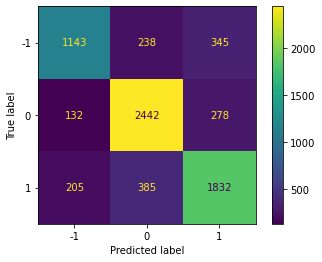

In [22]:
plot_confusion_matrix(dforest_pipe, X_test, y_test)

print(classification_report(dforest_pipe.predict(X_test), y_test))

In [23]:
fpipe_params = {
    'model__criterion' : ['gini', 'entropy'],
    'feature_union__count_transformer__count_vect__ngram_range': [(1,1), (1,2), (2,2)]
}

fpipe_grid = GridSearchCV(dforest_pipe, fpipe_params, cv=5, verbose = 100)

In [24]:
fpipe_grid.fit(X_train, y_train)

fpipe_grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=gini
[CV 1/5; 1/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=gini;, score=0.761 total time= 1.2min
[CV 2/5; 1/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=gini
[CV 2/5; 1/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=gini;, score=0.750 total time= 1.2min
[CV 3/5; 1/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=gini
[CV 3/5; 1/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=gini;, score=0.764 total time= 1.2min
[CV 4/5; 1/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=gini
[CV 4/5; 1/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__

c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 1/5; 3/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss;, score=nan total time=   0.7s
[CV 2/5; 3/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 2/5; 3/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss;, score=nan total time=   0.7s
[CV 3/5; 3/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 3/5; 3/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss;, score=nan total time=   0.7s
[CV 4/5; 3/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 4/5; 3/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss;, score=nan total time=   0.7s
[CV 5/5; 3/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 5/5; 3/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 1), model__criterion=log_loss;, score=nan total time=   0.7s
[CV 1/5; 4/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=gini
[CV 1/5; 4/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=gini;, score=0.751 total time= 9.3min
[CV 2/5; 4/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=gini
[CV 2/5; 4/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=gini;, score=0.742 total time= 8.5min
[CV 3/5; 4/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=gini
[CV 3/5; 4/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=gini;, score=0.754 total time= 8.9min
[CV 4/5; 4/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=gini
[CV 4/5; 4

c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 1/5; 6/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss;, score=nan total time=   2.9s
[CV 2/5; 6/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 2/5; 6/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss;, score=nan total time=   2.8s
[CV 3/5; 6/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 3/5; 6/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss;, score=nan total time=   2.8s
[CV 4/5; 6/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 4/5; 6/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss;, score=nan total time=   2.8s
[CV 5/5; 6/9] START feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 5/5; 6/9] END feature_union__count_transformer__count_vect__ngram_range=(1, 2), model__criterion=log_loss;, score=nan total time=   2.9s
[CV 1/5; 7/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=gini
[CV 1/5; 7/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=gini;, score=0.671 total time= 7.1min
[CV 2/5; 7/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=gini
[CV 2/5; 7/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=gini;, score=0.672 total time= 7.1min
[CV 3/5; 7/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=gini
[CV 3/5; 7/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=gini;, score=0.670 total time= 6.9min
[CV 4/5; 7/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=gini
[CV 4/5; 7

c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 1/5; 9/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss;, score=nan total time=   2.2s
[CV 2/5; 9/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 2/5; 9/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss;, score=nan total time=   2.2s
[CV 3/5; 9/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 3/5; 9/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss;, score=nan total time=   2.2s
[CV 4/5; 9/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 4/5; 9/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss;, score=nan total time=   2.2s
[CV 5/5; 9/9] START feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss


c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

[CV 5/5; 9/9] END feature_union__count_transformer__count_vect__ngram_range=(2, 2), model__criterion=log_loss;, score=nan total time=   2.3s


{'feature_union__count_transformer__count_vect__ngram_range': (1, 1),
 'model__criterion': 'gini'}

              precision    recall  f1-score   support

          -1       0.66      0.77      0.71      1491
           0       0.86      0.80      0.83      3044
           1       0.76      0.74      0.75      2465

    accuracy                           0.77      7000
   macro avg       0.76      0.77      0.76      7000
weighted avg       0.78      0.77      0.78      7000



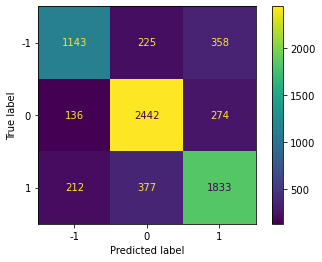

In [26]:
# Did all this just for the best model to be the original LOL

plot_confusion_matrix(fpipe_grid.best_estimator_, X_test, y_test)

print(classification_report(fpipe_grid.best_estimator_.predict(X_test), y_test))